# Customer Churn Prediction

End-to-end data analytics & ML project.

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, roc_curve
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")


In [3]:

np.random.seed(42)
n = 2000

data = pd.DataFrame({
    "tenure_months": np.random.randint(1, 72, n),
    "monthly_charges": np.random.uniform(20, 120, n),
    "total_charges": np.random.uniform(100, 8000, n),
    "contract_type": np.random.choice(["Month-to-Month", "One Year", "Two Year"], n, p=[0.6,0.25,0.15]),
    "internet_service": np.random.choice(["DSL","Fiber","None"], n, p=[0.4,0.5,0.1]),
    "tech_support": np.random.choice(["Yes","No"], n, p=[0.3,0.7]),
    "payment_method": np.random.choice(["Credit Card","Debit Card","Bank Transfer","E-Wallet"], n),
    "senior_citizen": np.random.choice([0,1], n, p=[0.85,0.15])
})

data["churn"] = (
    (data["contract_type"]=="Month-to-Month").astype(int) +
    (data["tenure_months"]<12).astype(int) +
    (data["tech_support"]=="No").astype(int) +
    (data["monthly_charges"]>90).astype(int) +
    np.random.binomial(1,0.2,n)
)
data["churn"] = (data["churn"]>2).astype(int)
data.head()


,tenure_months,monthly_charges,total_charges,contract_type,internet_service,tech_support,payment_method,senior_citizen,churn
0,52,45.467062,5290.540936,One Year,Fiber,No,Debit Card,0,0
1,15,104.087158,7197.253086,Month-to-Month,Fiber,No,Debit Card,0,1
2,61,23.842635,3256.198398,One Year,Fiber,No,E-Wallet,0,0
3,21,110.176199,2681.678176,Month-to-Month,DSL,No,Bank Transfer,1,1
4,24,66.147746,185.407561,Month-to-Month,Fiber,No,Debit Card,0,1


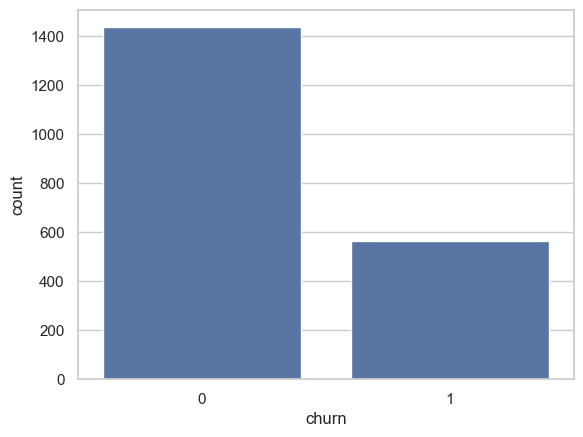

In [4]:

sns.countplot(x="churn", data=data)
plt.show()


**Data Preprocessing**

In [5]:

le = LabelEncoder()
for col in ["contract_type","internet_service","tech_support","payment_method"]:
    data[col] = le.fit_transform(data[col])

X = data.drop("churn", axis=1)
y = data["churn"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Training the models**

In [6]:

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_prob_lr = lr.predict_proba(X_test_scaled)[:,1]

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_prob_rf = rf.predict_proba(X_test)[:,1]

xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb.fit(X_train, y_train)
y_prob_xgb = xgb.predict_proba(X_test)[:,1]

print("LR ROC-AUC:", roc_auc_score(y_test, y_prob_lr))
print("RF ROC-AUC:", roc_auc_score(y_test, y_prob_rf))
print("XGB ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))


LR ROC-AUC: 0.8539052141469581
RF ROC-AUC: 0.9240233110295705
XGB ROC-AUC: 0.9310844562301501
